Data Preparing

In [ ]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np 



! pip install scikit-plot
import scikitplot as skplt

In [ ]:
df = pd.read_csv("/content/2.21.22 - Full User Join Date.xlsx - Worksheet.csv")
df.head(3)

,User Id,Status,Joined On,Verified,Profile Completed,Date of Birth
0,231,active,2022-02-21 15:13:17,True,Yes,1965-10-11
1,230,active,2022-02-21 06:08:00,True,Yes,1991-08-09
2,229,active,2022-02-21 04:48:45,True,Yes,2001-02-13


## EDA

In [ ]:
df.shape

(218, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User Id            218 non-null    int64 
 1   Status             218 non-null    object
 2   Joined On          218 non-null    object
 3   Verified           218 non-null    bool  
 4   Profile Completed  218 non-null    object
 5   Date of Birth      209 non-null    object
dtypes: bool(1), int64(1), object(4)
memory usage: 8.9+ KB


In [ ]:
# set identifier "User Id" as string
#df['User Id'] = df['User Id'].astype('str')
# set categorical data
df['Status'] = df['Status'].astype('category')
df['Verified'] = df['Verified'].astype('category')
df['Profile Completed'] = df['Profile Completed'].astype('category')


In [ ]:
# set datetime data
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])
df['Joined On'] = pd.to_datetime(df['Joined On'])

In [ ]:
# Total number of users is 218
n = len(df['User Id'].unique())

In [ ]:
# Active rate is 98%
active_rate = df.Status.value_counts() / n
active_rate

active      0.981651
inactive    0.018349
Name: Status, dtype: float64

In [ ]:
# Verified rate is 83%
verified_rate = df.Verified	.value_counts() / n
verified_rate

True     0.834862
False    0.165138
Name: Verified, dtype: float64

In [ ]:
# Profile Completed is 96%
profile_cmplt_rate = df['Profile Completed'].value_counts() / n
profile_cmplt_rate

Yes    0.958716
No     0.041284
Name: Profile Completed, dtype: float64

# Number of new user per month and week 

In [ ]:
# Month
df_newuser_m = df.resample('M', on='Joined On').count()
df_newuser_m

,User Id,Status,Joined On,Verified,Profile Completed,Date of Birth
Joined On,,,,,,
2021-08-31,3,3,3,3,3,3
2021-09-30,32,32,32,32,32,31
2021-10-31,54,54,54,54,54,53
2021-11-30,32,32,32,32,32,30
2021-12-31,29,29,29,29,29,29
2022-01-31,20,20,20,20,20,19
2022-02-28,48,48,48,48,48,44


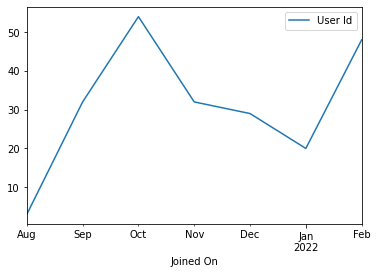

In [ ]:
df_newuser_m.plot(y='User Id', use_index=True)

In [ ]:
# week
df_newuser_w = df.resample('W', on='Joined On').count()
df_newuser_w

,User Id,Status,Joined On,Verified,Profile Completed,Date of Birth
Joined On,,,,,,
2021-08-29,2,2,2,2,2,2
2021-09-05,1,1,1,1,1,1
2021-09-12,0,0,0,0,0,0
2021-09-19,6,6,6,6,6,6
2021-09-26,25,25,25,25,25,24
2021-10-03,1,1,1,1,1,1
2021-10-10,35,35,35,35,35,35
2021-10-17,6,6,6,6,6,6
2021-10-24,8,8,8,8,8,7


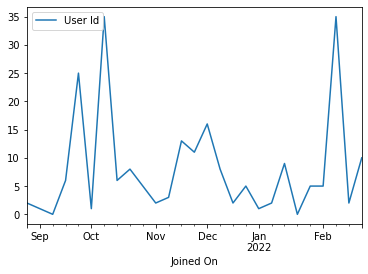

In [ ]:
df_newuser_w.plot(y='User Id', use_index=True)

Distrubution of Users Age 

In [ ]:
df_newuser_age = df.resample('Y', on='Date of Birth').count()
df_newuser_age

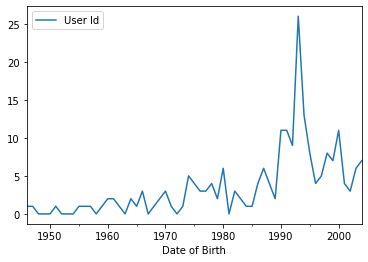

In [ ]:
df_newuser_age.plot(y='User Id', use_index=True)

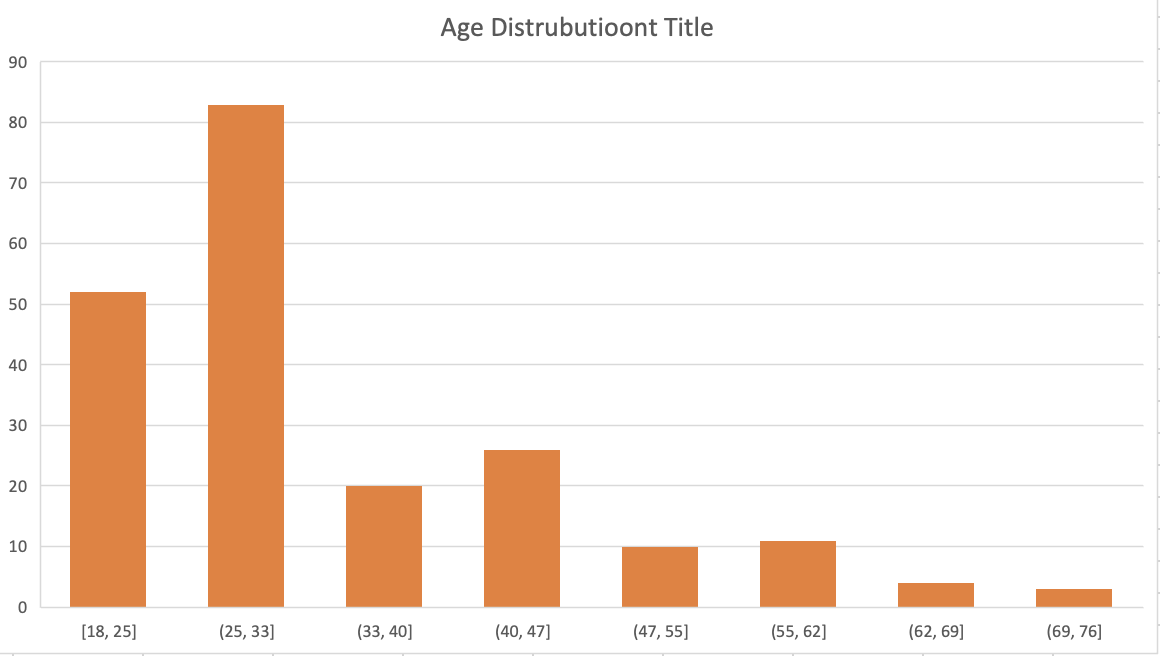

## Top 20 users info 

In [ ]:
top_20_user = [4,11,5,15,51,14,6,67,75,130,77,48,156,22,118,9,157,134,114,81]

In [ ]:
df['User Id'] = df['User Id'].astype("category")
a =df['User Id'].cat.set_categories(top_20_user, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [ ]:
df[df['User Id'].isin(top_20_user)]


,User Id,Status,Joined On,Verified,Profile Completed,Date of Birth
72,157,active,2021-12-20 14:59:57,True,Yes,1993-06-29
73,156,active,2021-12-20 12:23:09,True,Yes,1991-10-18
94,134,active,2021-12-01 18:45:29,True,Yes,1978-03-10
96,130,active,2021-12-01 14:00:27,True,Yes,1961-04-28
108,118,active,2021-11-23 00:14:26,True,Yes,1990-03-06
112,114,active,2021-11-19 14:54:02,True,Yes,1979-09-21
143,81,active,2021-10-16 04:10:27,True,Yes,1964-06-05
147,77,active,2021-10-11 15:33:40,True,Yes,1980-09-11
149,75,active,2021-10-07 19:02:41,True,Yes,1975-03-22
156,67,active,2021-10-06 11:47:03,True,Yes,1993-07-11


In [ ]:
df_top_20_user = df.sort_values(['User Id'])  ## 'sort' changed to 'sort_values'
df_top_20_user = df_top_20_user.head(20)
df_top_20_user

,User Id,Status,Joined On,Verified,Profile Completed,Date of Birth
214,4,active,2021-09-19 10:15:22,True,Yes,1992-05-02
207,11,active,2021-09-20 04:54:19,True,Yes,1974-03-16
213,5,active,2021-09-19 17:14:06,True,Yes,1970-07-11
203,15,active,2021-09-21 14:45:05,True,Yes,1995-02-23
172,51,active,2021-10-05 13:52:25,True,Yes,1990-03-14
204,14,active,2021-09-20 21:53:40,True,Yes,1994-10-05
212,6,active,2021-09-19 17:22:33,True,Yes,2000-03-20
156,67,active,2021-10-06 11:47:03,True,Yes,1993-07-11
149,75,active,2021-10-07 19:02:41,True,Yes,1975-03-22
96,130,active,2021-12-01 14:00:27,True,Yes,1961-04-28


In [ ]:
df_top_20_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 214 to 143
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User Id            20 non-null     category      
 1   Status             20 non-null     category      
 2   Joined On          20 non-null     datetime64[ns]
 3   Verified           20 non-null     category      
 4   Profile Completed  20 non-null     category      
 5   Date of Birth      20 non-null     datetime64[ns]
dtypes: category(4), datetime64[ns](2)
memory usage: 1.6 KB


Top users by Joined date

In [ ]:
df_top_20_user_m = df_top_20_user.resample('M', on='Joined On').count()
df_top_20_user_m

,User Id,Status,Joined On,Verified,Profile Completed,Date of Birth
Joined On,,,,,,
2021-09-30,8,8,8,8,8,8
2021-10-31,6,6,6,6,6,6
2021-11-30,2,2,2,2,2,2
2021-12-31,4,4,4,4,4,4


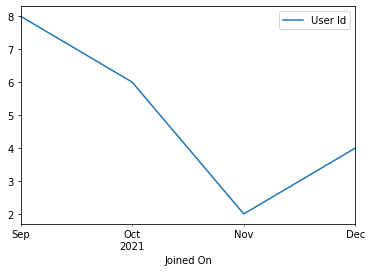

In [ ]:
df_top_20_user_m.plot(y='User Id', use_index=True)

In [ ]:
df_top_20_user_age = df_top_20_user.resample('Y', on='Date of Birth').count()
df_top_20_user_age

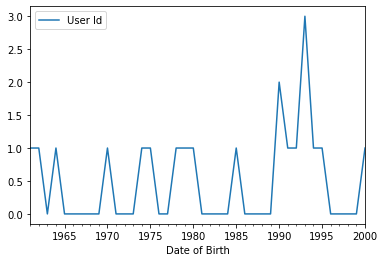

In [ ]:
df_top_20_user_age.plot(y='User Id', use_index=True)